In [2]:
import sys
sys.path.append('/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/starter')
from utils import get_points_renderer, get_mesh_renderer, load_cow_mesh
import pytorch3d
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
renderer = get_mesh_renderer(image_size=512)

In [18]:
t_vertices = torch.tensor([[1., -1., 0.], [-1., -1., 0.], [0., 1., 0.], [0., 0., 1.]])
t_faces = torch.tensor([[0, 1, 2], [1, 2, 3], [2, 3, 0], [0, 1, 3]])
t_vertices = t_vertices.unsqueeze(0)
t_faces = t_faces.unsqueeze(0)

t_texture_rgb = torch.ones_like(t_vertices)
t_texture_rgb = t_texture_rgb * torch.tensor([0.7, 0.7, 1])
t_textures = pytorch3d.renderer.TexturesVertex(t_texture_rgb)

t_meshes = pytorch3d.structures.Meshes(
    verts=t_vertices,
    faces=t_faces,
    textures=t_textures,
)

In [5]:
print(t_vertices.shape)

torch.Size([1, 4, 3])


In [6]:
views=5
R,T = pytorch3d.renderer.cameras.look_at_view_transform(
    dist = 5,
    elev = 0,
    azim = np.linspace(-180, 180, views, endpoint=False),
)

lights = pytorch3d.renderer.PointLights(location=[[0, 0, -4]], device=device)
images = []
for i in range(views):
    # Create a new camera for each viewpoint
    camera = pytorch3d.renderer.FoVPerspectiveCameras(
        R=R[i:i+1], T=T[i:i+1], device=device
    )
    # Render the mesh from the current viewpoint with lights
    image = renderer(t_meshes, cameras=camera, lights=lights)
    images.append(image)


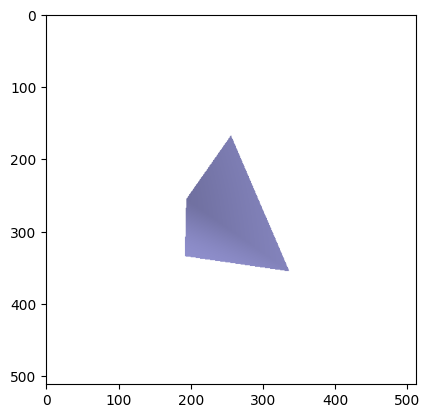

In [7]:
plt.imshow(images[3].squeeze(0))

In [8]:
images_rgb=[]
for image in images:
    images_rgb.append(image.squeeze(0))
images_rgb_uint8 = [(img * 255).numpy().astype('uint8') for img in images_rgb]

In [13]:
imageio.mimsave('/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/tetra/tetra.gif', images_rgb_uint8)

In [48]:
cube_v = torch.tensor([[-0.5, -0.5, 0.5], [-0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, -0.5, 0.5], [-0.5, -0.5, -0.5], [-0.5, 0.5, -0.5], [0.5, 0.5, -0.5], [0.5, -0.5, -0.5]])
cube_v = cube_v.unsqueeze(0)
cube_f = torch.tensor([[0,1,2],[0,2,3],[4,5,6],[4,7,6],[2,6,7],[2,7,3],[1,5,4],[0,1,4]])
cube_f = cube_f.unsqueeze(0)
cube_texture_rgb = torch.ones_like(cube_v)
cube_texture_rgb = cube_texture_rgb * torch.tensor([1.0, 0.7, 1])
cube_texture = pytorch3d.renderer.TexturesVertex(cube_texture_rgb)

c_meshes = pytorch3d.structures.Meshes(
    verts=cube_v,
    faces=cube_f,
    textures=cube_texture,
)

In [49]:
views=10
R,T = pytorch3d.renderer.cameras.look_at_view_transform(
    dist = 5,
    elev = 0,
    azim = np.linspace(-180, 180, views, endpoint=False),
)

lights = pytorch3d.renderer.PointLights(location=[[0, 0, -4]], device=device)
images = []
for i in range(views):
    # Create a new camera for each viewpoint
    camera = pytorch3d.renderer.FoVPerspectiveCameras(
        R=R[i:i+1], T=T[i:i+1], device=device
    )
    # Render the mesh from the current viewpoint with lights
    image = renderer(c_meshes, cameras=camera, lights=lights)
    images.append(image)

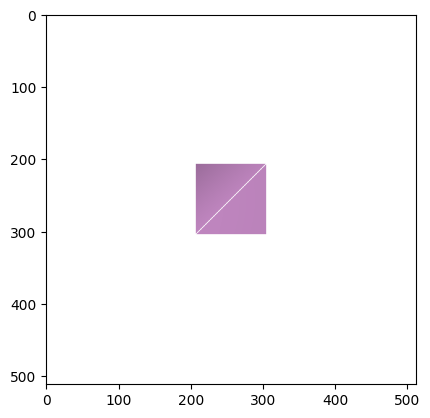

In [50]:
plt.imshow(images[5].squeeze(0))

In [51]:
images_rgb=[]
for image in images:
    images_rgb.append(image.squeeze(0))
images_rgb_uint8 = [(img * 255).numpy().astype('uint8') for img in images_rgb]

In [52]:
imageio.mimsave('/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/tetra/cube.gif', images_rgb_uint8)

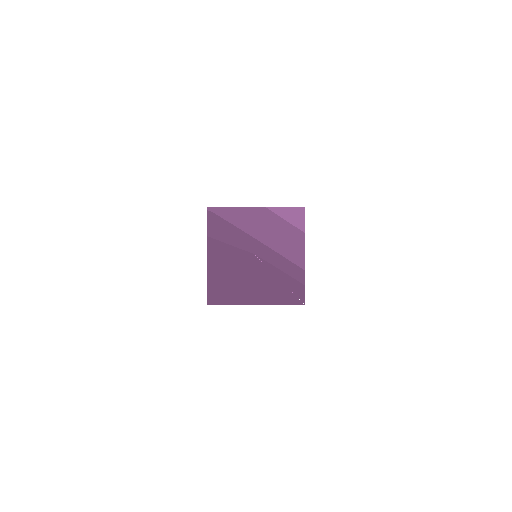

In [53]:
from IPython.display import Image

with open('/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/tetra/cube.gif','rb') as file:
    display(Image(file.read()))

In [73]:
color1=torch.tensor([1, 0., 0.]).unsqueeze(0)
color2=torch.tensor([0,0,1.5]).unsqueeze(0)
vertices, faces = load_cow_mesh("/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/data/cow.obj")
vertices = vertices.unsqueeze(0)
faces = faces.unsqueeze(0)
z_min = torch.min(vertices[:,:,2])
z_max = torch.max(vertices[:,:,2])
z = vertices[:,:,2]
alpha = (z - z_min) / (z_max - z_min)
alpha = alpha.unsqueeze(-1)
color = alpha * color2 + (1 - alpha) * color1
textures = torch.ones_like(vertices)
textures = textures * torch.tensor(color)
meshes = pytorch3d.structures.Meshes(
    verts=vertices,
    faces=faces,
    textures=pytorch3d.renderer.TexturesVertex(textures),
)
meshes = meshes.to(device)

/var/folders/x_/z3g1g6n53jb2pphr7ndyvl5w0000gn/T/ipykernel_45001/601555480.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  textures = textures * torch.tensor(color)


In [74]:
print(color1.shape)

torch.Size([1, 3])


In [75]:
R,T = pytorch3d.renderer.cameras.look_at_view_transform(
    dist = 2,
    elev = 0,
    azim = -45,
    degrees=True
)

In [76]:
camera = pytorch3d.renderer.FoVPerspectiveCameras(
        R=R, T=T, device=device
    )

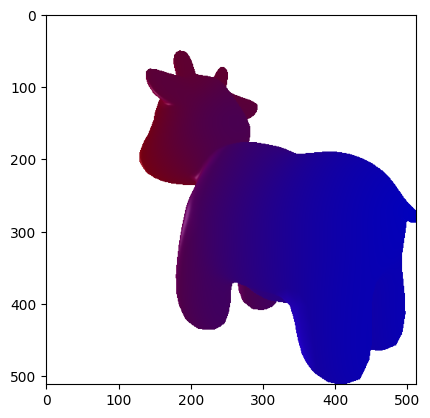

In [77]:
image = renderer(meshes, cameras=camera, lights=lights)
plt.imshow(image.squeeze(0))